In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
# Function to plot delay_min for every direction for a specific bus number

data = pd.read_csv('bus_cleaned.csv')
print(data.head())
    

         date  route_num   exact_time day_of_week              location  \
0  2014-01-01         95  12:23:00 AM   Wednesday    YORK MILLS STATION   
1  2014-01-01        102  12:55:00 AM   Wednesday  ENTIRE RUN FOR ROUTE   
2  2014-01-01         54   1:28:00 AM   Wednesday   LAWRENCE AND WARDEN   
3  2014-01-01        112   1:30:00 AM   Wednesday       KIPLING STATION   
4  2014-01-01         24   1:37:00 AM   Wednesday      VP AND ELLESMERE   

             incident  delay_min  gap_min direction  vehicle  year  month  \
0          Mechanical         10     20.0         E   1734.0  2014      1   
1       General Delay         33     66.0       b/w   8110.0  2014      1   
2          Mechanical         10     20.0        WB   7478.0  2014      1   
3  Emergency Services         18     36.0         N   8084.0  2014      1   
4       Investigation         10     20.0         n   7843.0  2014      1   

   day  hour  min  at_station delay_type direction_simp  
0    1     0   23           

Mean Delay: 9.41 minutes
Standard Deviation of Delay: 4.93 minutes


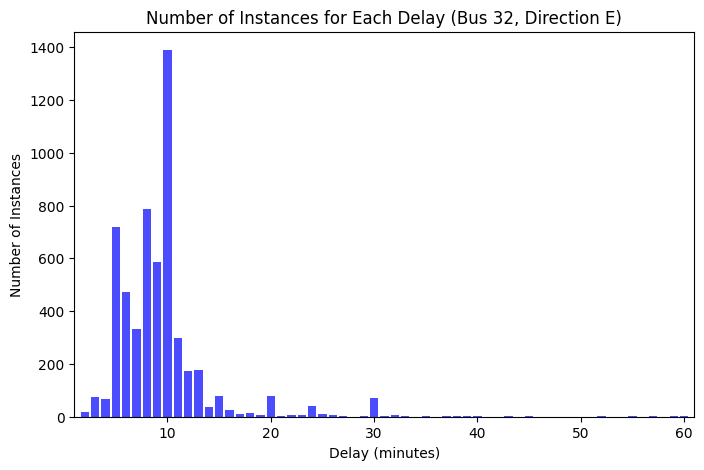

Returned Mean: 9.41, Returned Standard Deviation: 4.93


In [7]:
def plot_delay_distribution(bus_number, direction_input, data):
    """
    This method takes a bus number and direction, calculates the mean and standard deviation of delay,
    and displays a bar plot of delay distribution for the given bus number and direction.
    
    Parameters:
    bus_number (int): The bus number to filter by.
    direction_input (str): The direction to filter by (e.g., 'E', 'N', 'S', 'W').
    data (DataFrame): The pandas DataFrame containing the bus data.
    
    Returns:
    tuple: Mean and standard deviation of delay values.
    """
    # Filter data for the specific bus number and direction
    bus_data = data[data['route_num'] == bus_number]
    direction_data = bus_data[bus_data['direction_simp'] == direction_input]

    # Ensure the direction data exists
    if direction_data.empty:
        print(f"No data found for bus number {bus_number} and direction {direction_input}.")
        return None, None
    else:
        # Filter out delays greater than 200 minutes
        direction_data_filtered = direction_data[direction_data['delay_min'] <= 60]

        # Calculate the mean and standard deviation
        mean_delay = direction_data_filtered['delay_min'].mean()
        std_delay = direction_data_filtered['delay_min'].std()

        # Print the mean and standard deviation
        print(f"Mean Delay: {mean_delay:.2f} minutes")
        print(f"Standard Deviation of Delay: {std_delay:.2f} minutes")

        # Count the occurrences of each unique delay value
        delay_counts = direction_data_filtered['delay_min'].value_counts().sort_index()

        # Plot delay on the y-axis and number of instances (occurrences) on the x-axis
        plt.figure(figsize=(8, 5))
        plt.bar(delay_counts.index, delay_counts.values, color='blue', alpha=0.7)

        # Adjust the x-axis limits to zoom in on the area with more data points
        plt.xlim(min(delay_counts.index) - 1, max(delay_counts.index) + 1)  # Slightly trim the x-axis

        # Add title and labels
        plt.title(f"Number of Instances for Each Delay (Bus {bus_number}, Direction {direction_input})")
        plt.xlabel('Delay (minutes)')
        plt.ylabel('Number of Instances')

        # Show the plot
        plt.show()

        # Return the mean and standard deviation
        return mean_delay, std_delay

# Load the CSV file
data = pd.read_csv('bus_cleaned.csv')

# Call the method with bus number 32 and direction 'E'
mean, std_dev = plot_delay_distribution(32, 'E', data)

# Optionally, print the returned values
print(f"Returned Mean: {mean:.2f}, Returned Standard Deviation: {std_dev:.2f}")

Mean Delay: 9.41 minutes
Standard Deviation of Delay: 4.93 minutes


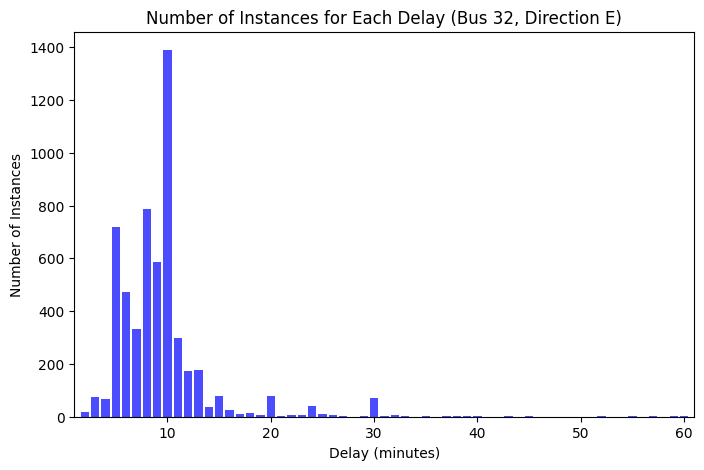

Returned Mean: 9.41, Returned Standard Deviation: 4.93

Monte Carlo Simulation Results (10,000 runs):
Minimum Simulated Delay: 0.00 minutes
Maximum Simulated Delay: 28.76 minutes
Average Simulated Delay: 9.45 minutes


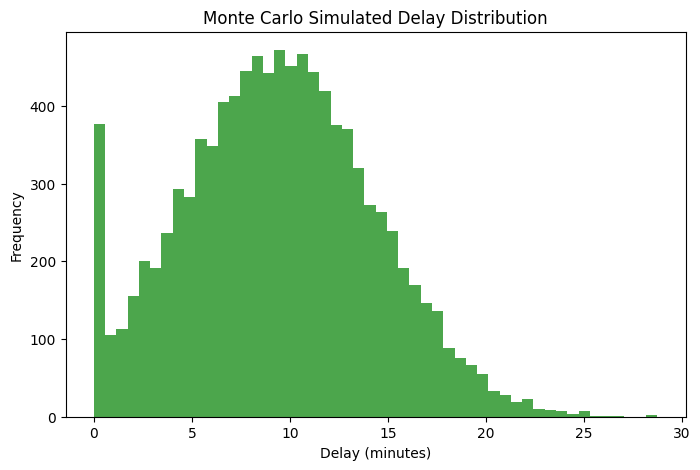

In [8]:
# Call the method with bus number 32 and direction 'E'
mean, std_dev = plot_delay_distribution(32, 'E', data)

# Optionally, print the returned values
if mean is not None and std_dev is not None:
    print(f"Returned Mean: {mean:.2f}, Returned Standard Deviation: {std_dev:.2f}")

    # ---------- Monte Carlo Simulation ---------- #
    np.random.seed(42)  # For reproducibility
    num_simulations = 10000

    # Generate simulated delays using a normal distribution
    simulated_delays = np.random.normal(loc=mean, scale=std_dev, size=num_simulations)
    # Ensure no negative delay values
    simulated_delays = np.clip(simulated_delays, a_min=0, a_max=None)

    # Calculate min, max, and average delay from simulation
    min_delay = np.min(simulated_delays)
    max_delay = np.max(simulated_delays)
    avg_delay = np.mean(simulated_delays)

    print("\nMonte Carlo Simulation Results (10,000 runs):")
    print(f"Minimum Simulated Delay: {min_delay:.2f} minutes")
    print(f"Maximum Simulated Delay: {max_delay:.2f} minutes")
    print(f"Average Simulated Delay: {avg_delay:.2f} minutes")

    # Plot a histogram for the simulated delay distribution
    plt.figure(figsize=(8, 5))
    plt.hist(simulated_delays, bins=50, color='green', alpha=0.7)
    plt.title("Monte Carlo Simulated Delay Distribution")
    plt.xlabel("Delay (minutes)")
    plt.ylabel("Frequency")
    plt.show()


[Bus 73, Direction S]
Mean Delay: 15.56 minutes
Standard Deviation: 7.18 minutes


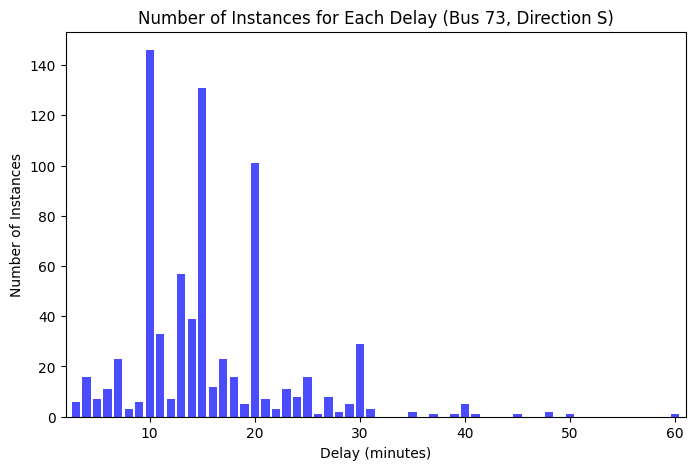

Monte Carlo Simulation Results:
Min Delay: 0.00 min | Max Delay: 43.74 min | Avg Delay: 15.58 min


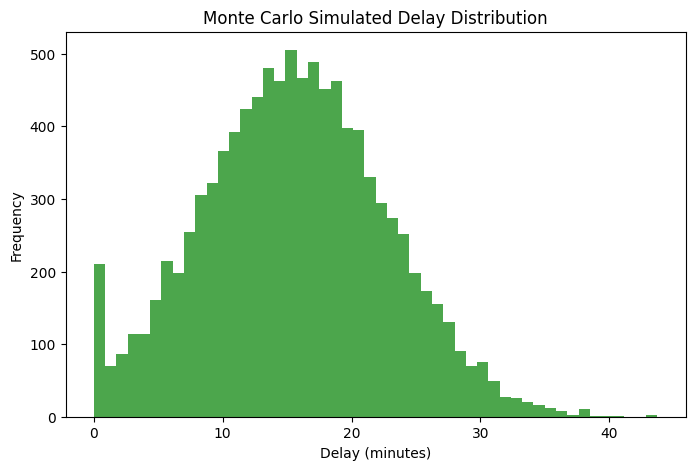


[Bus 76, Direction S]
Mean Delay: 8.95 minutes
Standard Deviation: 5.87 minutes


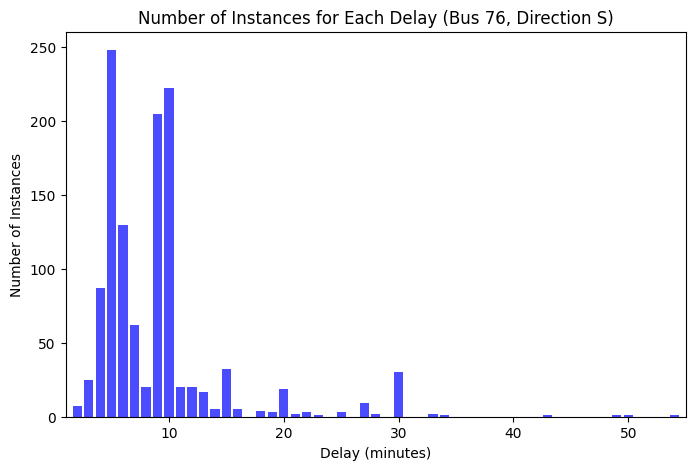

Monte Carlo Simulation Results:
Min Delay: 0.00 min | Max Delay: 32.00 min | Avg Delay: 9.11 min


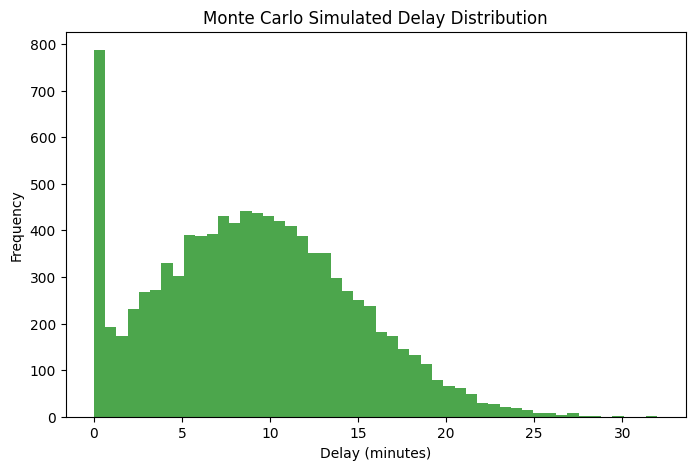


========= Summary of Monte Carlo Delay Results =========
Bus 73 (S): Min=0.00, Avg=15.58, Max=43.74
Bus 76 (S): Min=0.00, Avg=9.11, Max=32.00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from routeExtract import extract_bus_numbers, extract_bus_directions, extract_transit_steps, get_transit_routes

def plot_delay_distribution(bus_number, direction_input, data):
    bus_data = data[data['route_num'] == bus_number]
    direction_data = bus_data[bus_data['direction_simp'] == direction_input]

    if direction_data.empty:
        print(f"No data found for bus number {bus_number} and direction {direction_input}.")
        return None, None

    direction_data_filtered = direction_data[direction_data['delay_min'] <= 60]

    mean_delay = direction_data_filtered['delay_min'].mean()
    std_delay = direction_data_filtered['delay_min'].std()

    print(f"\n[Bus {bus_number}, Direction {direction_input}]")
    print(f"Mean Delay: {mean_delay:.2f} minutes")
    print(f"Standard Deviation: {std_delay:.2f} minutes")

    delay_counts = direction_data_filtered['delay_min'].value_counts().sort_index()

    plt.figure(figsize=(8, 5))
    plt.bar(delay_counts.index, delay_counts.values, color='blue', alpha=0.7)
    plt.xlim(min(delay_counts.index) - 1, max(delay_counts.index) + 1)
    plt.title(f"Number of Instances for Each Delay (Bus {bus_number}, Direction {direction_input})")
    plt.xlabel('Delay (minutes)')
    plt.ylabel('Number of Instances')
    plt.show()

    return mean_delay, std_delay

def run_monte_carlo_simulation(mean, std_dev, num_simulations=10000):
    np.random.seed(42)
    simulated_delays = np.random.normal(loc=mean, scale=std_dev, size=num_simulations)
    simulated_delays = np.clip(simulated_delays, a_min=0, a_max=None)

    min_delay = np.min(simulated_delays)
    max_delay = np.max(simulated_delays)
    avg_delay = np.mean(simulated_delays)

    print("Monte Carlo Simulation Results:")
    print(f"Min Delay: {min_delay:.2f} min | Max Delay: {max_delay:.2f} min | Avg Delay: {avg_delay:.2f} min")

    plt.figure(figsize=(8, 5))
    plt.hist(simulated_delays, bins=50, color='green', alpha=0.7)
    plt.title("Monte Carlo Simulated Delay Distribution")
    plt.xlabel("Delay (minutes)")
    plt.ylabel("Frequency")
    plt.show()

    return min_delay, avg_delay, max_delay


# Load the CSV file
data = pd.read_csv('bus_cleaned.csv')

# Get bus numbers and directions from your API-based functions
API_KEY = "SE8BzcNeqwzk2XIkWJbAcKE0m27BIbTB2fzwSVfEOAE"
origin = "43.67913,-79.51035"
destination = "43.45581,-79.68252"

bus_numbers = extract_bus_numbers(API_KEY, origin, destination)
bus_directions = extract_bus_directions(API_KEY, origin, destination)

# Ensure lists are same length
if len(bus_numbers) != len(bus_directions):
    print("Mismatch in bus number and direction list lengths.")
else:
    results = []

    for bus_num, direction in zip(bus_numbers, bus_directions):
        # Convert direction to single-letter uppercase (e.g., 'north' -> 'N')
        dir_short = direction[0].upper() if direction else None
        if dir_short is None:
            print(f"Skipping bus {bus_num} due to unknown direction.")
            continue

        mean, std_dev = plot_delay_distribution(int(bus_num), dir_short, data)

        if mean is not None and std_dev is not None:
            min_d, avg_d, max_d = run_monte_carlo_simulation(mean, std_dev)
            results.append({
                'bus': bus_num,
                'direction': dir_short,
                'min_delay': min_d,
                'avg_delay': avg_d,
                'max_delay': max_d
            })

    # Optionally print summary table
    print("\n========= Summary of Monte Carlo Delay Results =========")
    for res in results:
        print(f"Bus {res['bus']} ({res['direction']}): Min={res['min_delay']:.2f}, Avg={res['avg_delay']:.2f}, Max={res['max_delay']:.2f}")
